In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from category_encoders import TargetEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


In [3]:
df = pd.read_csv("./data/data_g.csv")
print(df["price"].max())
df.head()

191.71


,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",133.10,1,1,30,0,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",1,32000,1
1,Women's Casual Comfort Mid Calf Knee High Roun...,35.33,4,0,47,0,"Clothing, Shoes & Accessories/Women/Women's Sh...",1,326000,1
2,G-Unit Style heavy weigh Tank Top Square Cut ...,16.03,3,0,47,0,"Clothing, Shoes & Accessories/Men/Men's Clothi...",1,207000,1
3,Men's 100% Cotton Big Polka Dot Design Spread...,29.44,3,1,47,1,"Clothing, Shoes & Accessories/Men/Men's Clothi...",1,48000,1
4,CALTOP OLD SCHOOL FLANNEL VETERANO SHORTSLEEVE...,63.03,3,0,47,1,"Clothing, Shoes & Accessories/Men/Men's Clothi...",1,103000,1


In [4]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df['category'] = enc.fit_transform(df[['category']]).astype(int)
kv_pair_ic = {category: i for i, category in enumerate(enc.categories_[0])}
print(kv_pair_ic)
print(len(enc.categories_[0]))
df.head()

{"Business & Industrial/Facility Maintenance & Safety/Personal Protective Equipment (PPE)/Protective Pants/Clothing, Shoes & Accessories/Men/Men's Clothing/Pants": 0, "Clothing, Shoes & Accessories/Kids/Boys/Kids/Boys/Boys' Clothing (Sizes 4 & Up)/Pants/Clothing, Shoes & Accessories/Women/Women's Clothing/Pants": 1, "Clothing, Shoes & Accessories/Men/Men's Clothing/Coats, Jackets & Vests": 2, "Clothing, Shoes & Accessories/Men/Men's Clothing/Coats, Jackets & Vests/Clothing, Shoes & Accessories/Men/Men's Clothing/Men/Men's Clothing/Shirts/Dress Shirts": 3, "Clothing, Shoes & Accessories/Men/Men's Clothing/Coats, Jackets & Vests/Clothing, Shoes & Accessories/Women/Women's Clothing/Coats, Jackets & Vests": 4, "Clothing, Shoes & Accessories/Men/Men's Clothing/Coats, Jackets & Vests/Sporting Goods/Fishing/Clothing, Shoes & Accessories/Coats, Jackets & Vests": 5, "Clothing, Shoes & Accessories/Men/Men's Clothing/Jeans": 6, "Clothing, Shoes & Accessories/Men/Men's Clothing/Jeans/Clothing, Sho

,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_item_sold,trending
0,"Nike Dunk Low Retro ""White Black Panda"" Shoes ...",133.10,1,1,30,0,96,1,32000,1
1,Women's Casual Comfort Mid Calf Knee High Roun...,35.33,4,0,47,0,226,1,326000,1
2,G-Unit Style heavy weigh Tank Top Square Cut ...,16.03,3,0,47,0,50,1,207000,1
3,Men's 100% Cotton Big Polka Dot Design Spread...,29.44,3,1,47,1,41,1,48000,1
4,CALTOP OLD SCHOOL FLANNEL VETERANO SHORTSLEEVE...,63.03,3,0,47,1,40,1,103000,1


In [5]:
tfid = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfid.fit_transform(df['name'])
k_means = KMeans(n_clusters=50, random_state=0)
k_means.fit(tfidf_matrix)
df['name'] = k_means.labels_
df.head()

/Users/jaxxsulav/Projects/Loyalist/Sem2/Step/PriceProphet/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_item_sold,trending
0,5,133.10,1,1,30,0,96,1,32000,1
1,16,35.33,4,0,47,0,226,1,326000,1
2,11,16.03,3,0,47,0,50,1,207000,1
3,32,29.44,3,1,47,1,41,1,48000,1
4,32,63.03,3,0,47,1,40,1,103000,1


In [6]:
df.to_csv("./data/data_g_n.csv", index=False)
X = df.drop(['price'], axis=1)
y = df['price']

In [7]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df['category'] = enc.fit_transform(df[['category']]).astype(int)
df["category"] = df["category"].astype(float)
df.head()

,name,price,item_condition,shipping,located_in,return_policy,category,money_back,seller_item_sold,trending
0,5,133.10,1,1,30,0,96.0,1,32000,1
1,16,35.33,4,0,47,0,226.0,1,326000,1
2,11,16.03,3,0,47,0,50.0,1,207000,1
3,32,29.44,3,1,47,1,41.0,1,48000,1
4,32,63.03,3,0,47,1,40.0,1,103000,1


In [8]:
df.dtypes

name                  int32
price               float64
item_condition        int64
shipping              int64
located_in            int64
return_policy         int64
category            float64
money_back            int64
seller_item_sold      int64
trending              int64
dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
enc = TargetEncoder(cols=['category'])
X_train = enc.fit_transform(X_train, y_train)
X_test = enc.transform(X_test)
len(X_train['category'].unique())


247

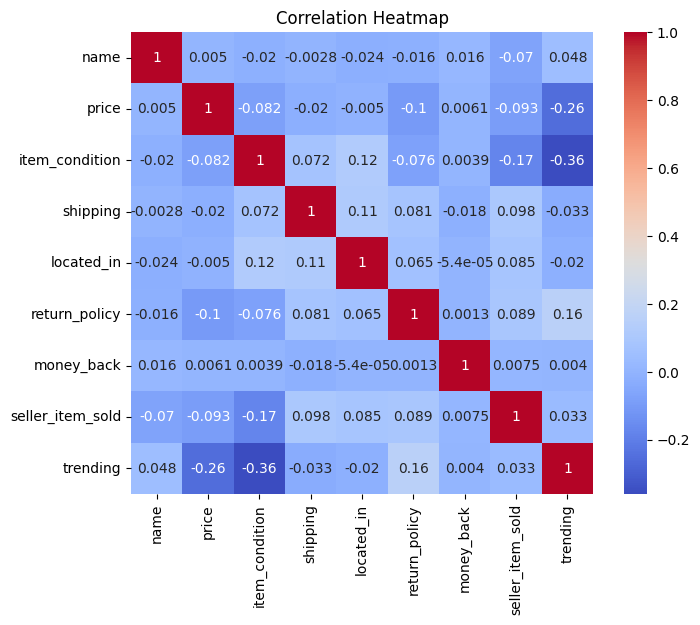

In [11]:


df.drop("category", axis=1, inplace=True)
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# X_train.head()

In [13]:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
from xgboost import XGBRegressor

# model = XGBRegressor(n_estimators=100, random_state=42)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8, random_state=42)



In [14]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores

array([-855.92581642, -775.64817703, -860.53159826, -882.1980114 ,
       -786.87445248])

In [15]:
cv_rmse = np.sqrt(-cv_scores)
print(f'CV RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}')


CV RMSE: 28.838918119645864 ± 0.7432447814457912


In [16]:
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [17]:
y_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {test_rmse}')


Test RMSE: 28.4401158113537
